In [2]:
import pickle

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Social_Network_Ads (1) copy.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    str    
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), str(1)
memory usage: 15.8 KB


In [7]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
x = df[["Age","EstimatedSalary"]]
y = df["Purchased"]


In [11]:
x = np.array(x)
y = np.array(y)


In [12]:
print(x.shape)
print(y.shape)


(400, 2)
(400,)


In [13]:
n = len(x)
split = int(n*0.8)

In [14]:
x_train = x[:split]
y_train = y[:split]

In [15]:
x_test = x[split:]
y_test = y[split:]

In [16]:
mean = np.mean(x_train,axis=0)
std = np.std(x_train,axis=0)
x_train_norm = (x_train-mean)/std
x_test_norm = (x_test-mean)/std

In [17]:
def pred(x_train_norm,w,b):
    z = np.dot(x_train_norm,w)+b
    sigmoid_z = 1/(1+(np.exp(-z)))
    return sigmoid_z

In [18]:
def loss(sigmoid_z,y_train):
    loss = -((y_train * np.log(sigmoid_z))+((1-y_train)*(np.log(1-sigmoid_z))))
    loss = (np.sum(loss))/len(y_train)
    return loss

In [19]:
def gradient(x_train_norm,y_train,sigmoid_z):
    err = sigmoid_z-y_train
    dw = np.mean(x_train_norm*err[:,np.newaxis],axis=0)
    db = np.mean(err)
    return dw,db



In [20]:
def gradient_descent(dw,db,a,w,b):
    w = w - a*dw
    b = b - a*db
    return w,b

In [21]:
def logistic_regression(x_train_norm,y_train,a=0.1,i=10000):
    w = np.zeros(x_train_norm.shape[1])
    b = 0
    
    for k in range(i):
        y_pred = pred(x_train_norm,w,b)
        losss = loss(y_pred,y_train)
        dw,db = gradient(x_train_norm, y_train, y_pred)
        w,b = gradient_descent(dw,db,a,w,b)
        if k % 100 == 0:
            print(f"Epoch {k}, Loss {losss}")
    return w,b


In [22]:
def predict_class(x_train_norm,w,b,threshold=0.5):
    probs = pred(x_train_norm,w,b)
    y_pred_class = (probs >= threshold).astype(int)
    return y_pred_class

In [23]:
def accuracy(y_pred_class,y_test):
    accuracy = np.mean(y_pred_class == y_test)
    return accuracy

In [24]:
def confusion_matrix(y_pred_class,y_test):
    tp =0
    tn =0
    fp =0
    fn =0
    for k in range(len(y_test)):
        if(y_pred_class[k]==1 and y_test[k]==1):
            tp+=1
        elif(y_pred_class[k]==0 and y_test[k]==0):
            tn+=1
        elif(y_pred_class[k]==1 and y_test[k]==0):
            fp+=1
        elif(y_pred_class[k]==0 and y_test[k]==1):
            fn+=1
    return tp,tn,fp,fn

In [25]:
def precision(tp,fp):
    return tp / (tp+fp) if (tp+fp) != 0 else 0

In [26]:
def recall(tp,fn):
    return tp / (tp+fn) if (tp+fn) != 0 else 0

In [27]:
def plot_decision_boundary(X, y, w, b):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]

    
    z = np.dot(grid, w) + b
    probs = 1 / (1 + np.exp(-z))
    probs = probs.reshape(xx.shape)

   
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3)

   
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0")
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1")

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()



In [28]:
w, b =logistic_regression(x_train_norm,y_train,a=0.1,i=1500)
y_pred_class = predict_class(x_test_norm,w,b,threshold=0.5)
tp, tn, fp, fn = confusion_matrix(y_pred_class, y_test)

Accuracy =accuracy(y_pred_class,y_test)
prec = precision(tp,fp)
rec = recall(tp,fn)

print("Accuracy: ",Accuracy)
print("precision ",prec)
print("recall: ",rec)



Epoch 0, Loss 0.6931471805599453
Epoch 100, Loss 0.3662166827914784
Epoch 200, Loss 0.3421984926134011
Epoch 300, Loss 0.33592480762741883
Epoch 400, Loss 0.33368227368562087
Epoch 500, Loss 0.33276029318842826
Epoch 600, Loss 0.3323512063879252
Epoch 700, Loss 0.33216115912115846
Epoch 800, Loss 0.3320702409087127
Epoch 900, Loss 0.33202589248013314
Epoch 1000, Loss 0.33200397322499425
Epoch 1100, Loss 0.3319930408992585
Epoch 1200, Loss 0.33198755381825035
Epoch 1300, Loss 0.33198478755741845
Epoch 1400, Loss 0.3319833886130564
Accuracy:  0.7625
precision  0.9705882352941176
recall:  0.6470588235294118


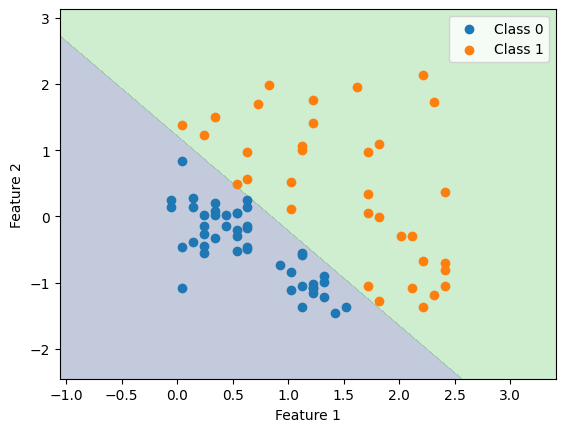

In [29]:
plot_decision_boundary(x_test_norm, y_pred_class, w, b)

In [30]:
pickle.dump([w, b], open("logistic_regression.pkl","wb"))
print("Model saved successfully!")

Model saved successfully!


In [31]:
print("Mean:", mean)
print("Std:", std)

Mean: [3.5593750e+01 7.0228125e+04]
Std: [1.01170011e+01 3.46007743e+04]
